<a href="https://colab.research.google.com/github/YonggunJung/AI2_Ploy/blob/main/17%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 텍스트 토큰화

In [1]:
# 텍스트 토큰화 (tokenization)
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전처리 할 텍스트
text = "해보지 않으면 해낼 수 없다."

# 텍스트를 text_to_word_sequence()를 사용하여 토큰화
result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다.

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [9]:
# Tokenizer()함수를 이용해서 단어의 빈도수 계산
from tensorflow.keras.preprocessing.text import Tokenizer

docs = ['먼저 텍스트의 각 단어를 나누어 토큰화합니다.',
        '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
        '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.'
        ]

In [10]:
# 토큰화 함수
token = Tokenizer()
# 토큰화 함수에 문장 적용
token.fit_on_texts(docs)

# 결과 확인
print("\n단어 카운트:\n", token.word_counts)


단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])


In [11]:
# Document_count()함수를 이용하여 몇 개의 문장이 있는지 확인
print("\n문장 카운트 : ", token.document_count)


문장 카운트 :  3


In [12]:
# word_docs()함수를 통해 각 단어들이 몇 개의 문장에서 나오는지 출력
print("\n각 단어가 몇 개의 문장에서 등장했는지 : ", token.word_docs)


각 단어가 몇 개의 문장에서 등장했는지 :  defaultdict(<class 'int'>, {'먼저': 1, '각': 1, '단어를': 1, '토큰화합니다': 1, '텍스트의': 2, '나누어': 1, '단어로': 1, '인식됩니다': 1, '딥러닝에서': 2, '토큰화해야': 1, '수': 1, '결과는': 1, '있습니다': 1, '사용할': 1, '토큰화한': 1})


In [13]:
# word_index()함수를 사용해서 인덱스 값 출력
print("\n각 단어에 매겨진 인덱스 값 : \n", token.word_index)


각 단어에 매겨진 인덱스 값 : 
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화합니다': 7, '단어로': 8, '토큰화해야': 9, '인식됩니다': 10, '토큰화한': 11, '결과는': 12, '사용할': 13, '수': 14, '있습니다': 15}


## 단어 원-핫 인코딩

In [14]:
# 단어가 문장의 다른 요소와 어떤 관계를 가지고 있는지 알아보는 방법

text = "오랫동안 꿈꾸는 이는 그 꿈을 닮아간다."

token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [15]:
# texts_to_sequences()함수를 사용해서 토큰의 인덱스만의 배열 만들기
x = token.texts_to_sequences([text])
print(x)

[[1, 2, 3, 4, 5, 6]]


In [16]:
# 인덱스로 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 인덱스 수에 하나를 추가해서 원핫 인코딩 배열 만들기
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size)
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


## 단어 임베딩

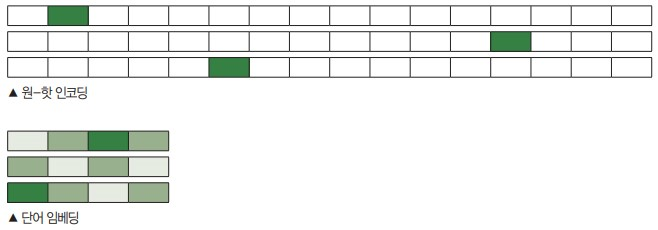

In [18]:
# 임베딩(embedding)은 원핫 인코딩으로 길어진 벡터의 길이를 해결 하기위함
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/embedding.jpg')
cv2_imshow(img)

In [19]:
# Embedding()함수를 사용해 단어 유사도 계산
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

model = Sequential()

# Embedding(입력크기, 출력크기)
# Embedding(총 단어 수, 벡터 크기)
# Embedding(16, 4, input_length=2) 이면 총 입력 값은 16개이지만 매번 두 개씩만 넣겠다는 의미
model.add(Embedding(16, 4))

## 텍스트 긍/부정 예측

In [22]:
import numpy as np
# 텍스트 리뷰 자료 지정
docs = ['너무 재밌네요', '최고예요', '참 잘 만든 영화에요', '추천하고 싶은 영화입니다.',
        '한 번 더 보고싶네요', '글쎄요', '별로예요', '생각보다 지루하네요',
        '연기가 어색해요', '재미없어요']

# 긍정 리뷰는 1, 부정리뷰는 0으로 클래스 지정
c = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [23]:
# Tokenizer()함수의 fit_on_texts를 이용해 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화에요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한': 11, '번': 12, '더': 13, '보고싶네요': 14, '글쎄요': 15, '별로예요': 16, '생각보다': 17, '지루하네요': 18, '연기가': 19, '어색해요': 20, '재미없어요': 21}


In [25]:
# 토큰에 지정된 인덱스로 새로운 배열 생성
x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과 :\n", x)


리뷰 텍스트, 토큰화 결과 :
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13, 14], [15], [16], [17, 18], [19, 20], [21]]


In [31]:
# 패딩(padding)은 토큰을 길이를 똑같이 맞춰주기 위함
# pad_sequences()함수는 케라스에서 제공
# 길이가 짧은 건 숫자 0을 채우고, 긴 건 잘라서 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_x = pad_sequences(x, 4)
print("\n 패딩 결과 : \n", padded_x)


 패딩 결과 : 
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [11 12 13 14]
 [ 0  0  0 15]
 [ 0  0  0 16]
 [ 0  0 17 18]
 [ 0  0 19 20]
 [ 0  0  0 21]]


In [32]:
# 총 입력 인덱스 갯수 정하기
# 단어의 맨 앞에 0이 먼저 나와야 하므로 총 단어 수에 1을 더해야 함
word_size = len(token.word_index) +1

In [33]:
# 출력값, 즉 몇개의 임베딩 결과를 사용할지 정하기
# 8개의 결과로 정하겠음 (맘대로 정한거임) 데이터에 따라 적절하게 변환
# 만들어진 8개의 결과는 우리 눈에 안보임
# 내부에서 계산해 딥러닝층으로 활용
# 매번 입력될 '단어 수 ' 정하기
# 패딩 과정을 거쳐 네 개의 길이로 맞추어 주었으므로 네 개의 단어가 들어가게 설정
Embedding(word_size, 8, input_length=4)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# 모델 만들기
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, c, epochs=20)
print("\n Accuracy : %.4f" % (model.evaluate(padded_x, c)[1]))

Epoch 1/20
1/1 [==============================] - 1s 856ms/step - loss: 0.6972 - accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6951 - accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6929 - accuracy: 0.4000
Epoch 4/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6887 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6866 - accuracy: 0.6000
Epoch 7/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6845 - accuracy: 0.8000
Epoch 8/20
1/1 [==============================] - 0s 12ms/step - loss: 0.6825 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 14ms/step - loss: 0.6804 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 15ms/step - loss: 0.6783 - accuracy: 0.9000
Epoch 11/20
1/1 [===========

In [40]:
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 텍스트 리뷰 자료 지정
docs = ['너무 재밌네요', '최고예요', '참 잘 만든 영화에요', '추천하고 싶은 영화입니다.',
        '한 번 더 보고싶네요', '글쎄요', '별로예요', '생각보다 지루하네요',
        '연기가 어색해요', '재미없어요']

# 긍정 리뷰는 1, 부정리뷰는 0으로 클래스 지정
c = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

x= token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n", x)

# 패딩, 데이터를 길이를 4로 맞추기
padded_x = pad_sequences(x, 4)
print("\n 패딩 결과 :\n", padded_x)

# 임베딩에 입력될 단어의 수를 지정
word_size = len(token.word_index) +1

# 단어 임베딩을 포함해 딥러닝 모델을 만들고 결과를 출력
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, c, epochs=20)
print('\n Accuracy : %.4f' % (model.evaluate(padded_x, c)[1]))
print('\n Accuracy :', model.evaluate(padded_x, c))

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화에요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한': 11, '번': 12, '더': 13, '보고싶네요': 14, '글쎄요': 15, '별로예요': 16, '생각보다': 17, '지루하네요': 18, '연기가': 19, '어색해요': 20, '재미없어요': 21}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13, 14], [15], [16], [17, 18], [19, 20], [21]]

 패딩 결과 :
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [11 12 13 14]
 [ 0  0  0 15]
 [ 0  0  0 16]
 [ 0  0 17 18]
 [ 0  0 19 20]
 [ 0  0  0 21]]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 4, 8)              176       
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
               

In [ ]:
# Accuracy : [0.6595471501350403, 1.0]
# 앞에껀 손실값, 뒤에께 정확도
# 학습까지만 함 예측은 안했음